# Image Classification
In this exercise, you will be classifying images about clothes. The data set you will be using is called `fashion-small.csv`.

### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.


In [1]:
# Import your libraries
import pandas as pd
import numpy as np

# classifiers:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# for confusion matrix & classification report
from sklearn import metrics

# for splitting data
from sklearn.model_selection import train_test_split

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Inspect and explore our data
1. Load the `fashion-small.csv` data into a pandas dataframe. 
2. Inspect / remove null values. 
3. Inspect / remove duplicate rows. 
4. Print out the number examples in each class aka the class balances. 
5. Visualize at least one image.

In [2]:
# 1. Load data into a pandas dataframe. 
df = pd.read_csv("data/fashion-small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,T-shirt/top,0,0,0,0,0,0,0,0,0,...,66,25,0,0,0,0,0,0,0,0
1,Trouser,0,0,0,0,0,0,0,0,0,...,170,25,0,0,0,0,0,0,0,0
2,Dress,0,0,0,0,0,0,0,0,0,...,76,80,0,0,0,1,0,0,0,0
3,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Dress,0,0,0,0,0,0,0,22,53,...,79,78,18,0,2,0,0,0,0,0


### Inspect for null values

In [3]:
# 2. Inspect / remove null values. 
df.isnull().sum().sum()

0

### Check for duplicates

In [4]:
# 3. Inspect / remove duplicate rows. 
df.duplicated().sum()

0

### Lets look at our class balances

In [5]:
# 4. Print out the number examples in each class aka the class balances. 
df["label"].value_counts()

Sandal         646
Trouser        612
Ankle boot     605
Shirt          601
Pullover       598
Coat           597
T-shirt/top    590
Dress          585
Bag            584
Sneaker        582
Name: label, dtype: int64

# Visualize one image

## First, we need to create a list that is just our pixel columns

In [6]:
# Grabs all of the columns 
pixels = df.columns

# Convert the all columns object into a regular list
pixels = list(pixels)

# Sanity check that it is now just a list.
print(type(pixels))

# Remove just the label column from the list
pixels.remove("label")

#print(pixels)

<class 'list'>


## Extract one row and reshape it to its original 28x28 shape and plot the reshaped image.

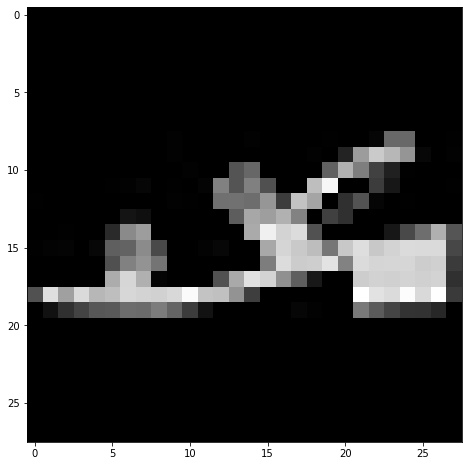

In [7]:
# Select just the pixel columns and convert them to a numpy array by using .values. 
images = df[pixels].values

# Select just one image from all the images
image = images[100]

# Reshape the image to be a 28x28 matrix (original format of image)
image = image.reshape(28,28)

# Plot reshaped image
plt.figure(figsize=(8,8))

plt.imshow(image, cmap = "gray")

___
# 2. Select and engineer our features.
1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 
2. Define our `X` and `y` data. 
2. Train-test-split our `X` and `y` data

### 1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 

In [8]:
# DOING THIS AGAIN JUST FOR PRACTICE 

# Grabs all of the columns 
selected_features = df.columns

# Convert the all columns object into a regular list
selected_features = list(selected_features)

# Sanity check that it is now just a list.
print(type(selected_features))

# Remove the label column from the list
# This happens 'in place'
selected_features.remove("label")

#print(selected_features)

<class 'list'>


### 2. Define our `X` and `y`

In [9]:
X = df[selected_features]

y = df["label"]

### 3. Train-test-split our `X` and `y` data

In [10]:
# 3. Train-test-split our `X` and `y` data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

____
# 3. Build and train our model
1. Initalize an empty Support Vector Classifier model.
2. Fit that model with our training data. 

In [11]:
# 1. Initalize an empty Support Vector Classifier model.
from sklearn import svm

# Initalize our Support Vector Classifier
model = svm.SVC()

In [12]:
 # 2. Fit that model with our training data. 
model.fit(X_train, y_train)

SVC()

___
# 4. Evaluate our model
1. Get a baseline accuracy score.
2. Make new predictions using our test data. 
3. Print the classification report. 
4. Plot the confusion matrix of our predicted results. 

### 1. Get a baseline accuracy score.

In [13]:
### 1. Get and print a baseline accuracy score.
accuracy = model.score(X_test, y_test)
print("Accuracy %f" % accuracy)

Accuracy 0.834000


### 2. Make new predictions using our test data. 

In [14]:
### 2. Make new predictions using our test data. 
y_predictions = model.predict(X_test)

### 3. Print the classification report. 
Use the sklearn helper fuction for this. 

In [15]:
### 3. Print the classification report. 
print(metrics.classification_report(y_test, y_predictions))


              precision    recall  f1-score   support

  Ankle boot       0.90      0.92      0.91       151
         Bag       0.93      0.94      0.94       143
        Coat       0.73      0.75      0.74       162
       Dress       0.75      0.91      0.82       138
    Pullover       0.74      0.75      0.75       143
      Sandal       0.95      0.94      0.94       173
       Shirt       0.68      0.48      0.57       155
     Sneaker       0.89      0.88      0.89       149
 T-shirt/top       0.76      0.85      0.81       150
     Trouser       0.99      0.93      0.96       136

    accuracy                           0.83      1500
   macro avg       0.83      0.84      0.83      1500
weighted avg       0.83      0.83      0.83      1500



### 4. Plot the confusion matrix of our predicted results. 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


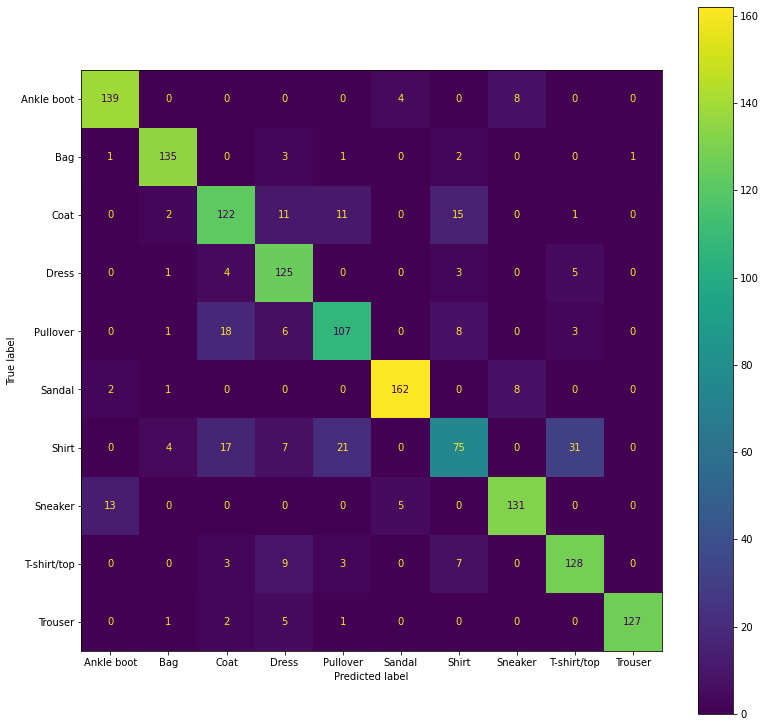

In [16]:
### 4. Plot the confusion matrix of our predicted results.
fig, ax = plt.subplots(figsize=(13,13))
metrics.plot_confusion_matrix(estimator = model, X = X_test, y_true = y_test, ax = ax)

### Looking at the confusion matrix, which two clothing items were mis-classfied with eachother the most?

In [17]:
print('The classifier mistaked YOUR_ANSWER_HERE and YOUR_ANSWER_HERE the most.')

The classifier mistaked YOUR_ANSWER_HERE and YOUR_ANSWER_HERE the most.


___
### Build a function thats input is an unfitted model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 

In [18]:
### Build a function thats input is an empty model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 
def build_and_eval_model(model, X, y, random_state=23):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) # split data
    
    model.fit(X_train, y_train) # fit model
    
    y_predictions = model.predict(X_test)
    
    print(metrics.classification_report(y_test, y_predictions))
    
    fig, ax = plt.subplots(figsize=(13,13))
    
    metrics.plot_confusion_matrix(estimator = model, X = X_test, y_true = y_test, ax = ax)
    
    return model

## Run LogisticRegression, RandomForest, and Multinomial Naive Bayes through the function you just built and compare the results. 
1. Which classifier did the best, and which classifier did the worst. 

              precision    recall  f1-score   support

  Ankle boot       0.89      0.93      0.91       144
         Bag       0.91      0.86      0.88       138
        Coat       0.65      0.68      0.67       144
       Dress       0.78      0.81      0.79       145
    Pullover       0.69      0.70      0.70       150
      Sandal       0.90      0.89      0.90       176
       Shirt       0.57      0.50      0.53       149
     Sneaker       0.91      0.90      0.91       149
 T-shirt/top       0.71      0.78      0.74       147
     Trouser       0.99      0.97      0.98       158

    accuracy                           0.80      1500
   macro avg       0.80      0.80      0.80      1500
weighted avg       0.80      0.80      0.80      1500



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


LogisticRegression()

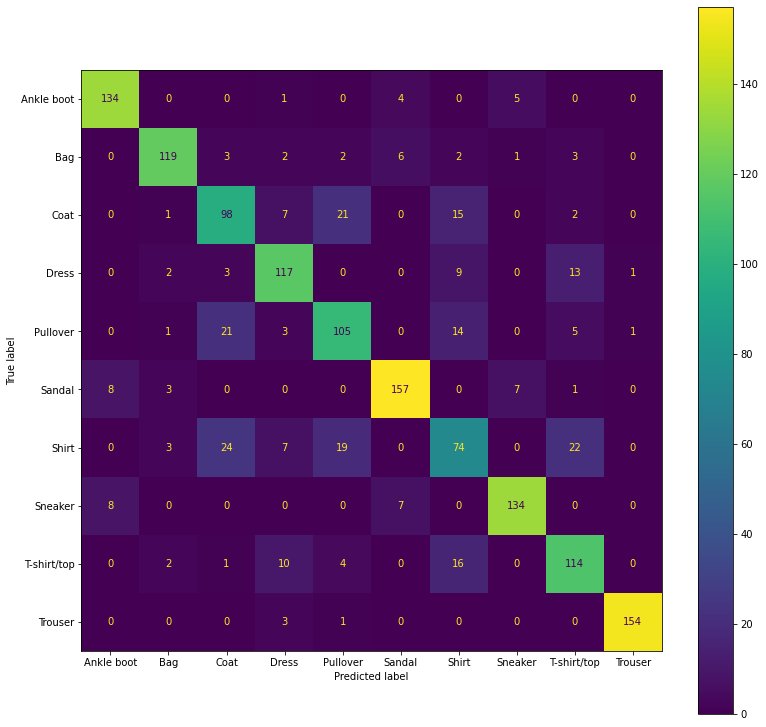

In [19]:
LR_model = LogisticRegression() # an empty logistic regression model

build_and_eval_model(LR_model, X, y)

              precision    recall  f1-score   support

  Ankle boot       0.90      0.96      0.93       143
         Bag       0.89      0.96      0.93       139
        Coat       0.69      0.81      0.74       131
       Dress       0.82      0.90      0.86       150
    Pullover       0.80      0.78      0.79       170
      Sandal       0.94      0.94      0.94       171
       Shirt       0.73      0.58      0.65       146
     Sneaker       0.95      0.87      0.91       160
 T-shirt/top       0.79      0.77      0.78       155
     Trouser       1.00      0.93      0.97       135

    accuracy                           0.85      1500
   macro avg       0.85      0.85      0.85      1500
weighted avg       0.85      0.85      0.85      1500



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


RandomForestClassifier()

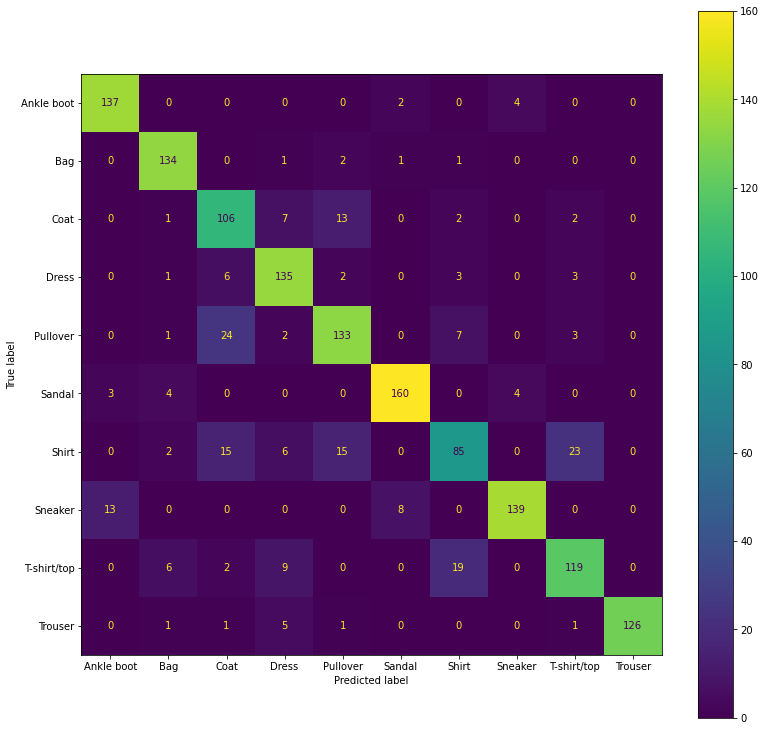

In [20]:
# RandomForest
RF_model = RandomForestClassifier() 

build_and_eval_model(RF_model, X, y)


              precision    recall  f1-score   support

  Ankle boot       0.67      0.82      0.74       160
         Bag       0.89      0.79      0.84       149
        Coat       0.46      0.56      0.51       137
       Dress       0.63      0.84      0.72       149
    Pullover       0.60      0.62      0.61       139
      Sandal       0.73      0.12      0.20       165
       Shirt       0.34      0.18      0.24       141
     Sneaker       0.54      0.88      0.67       158
 T-shirt/top       0.71      0.79      0.75       141
     Trouser       0.97      0.88      0.93       161

    accuracy                           0.65      1500
   macro avg       0.65      0.65      0.62      1500
weighted avg       0.66      0.65      0.62      1500



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


MultinomialNB()

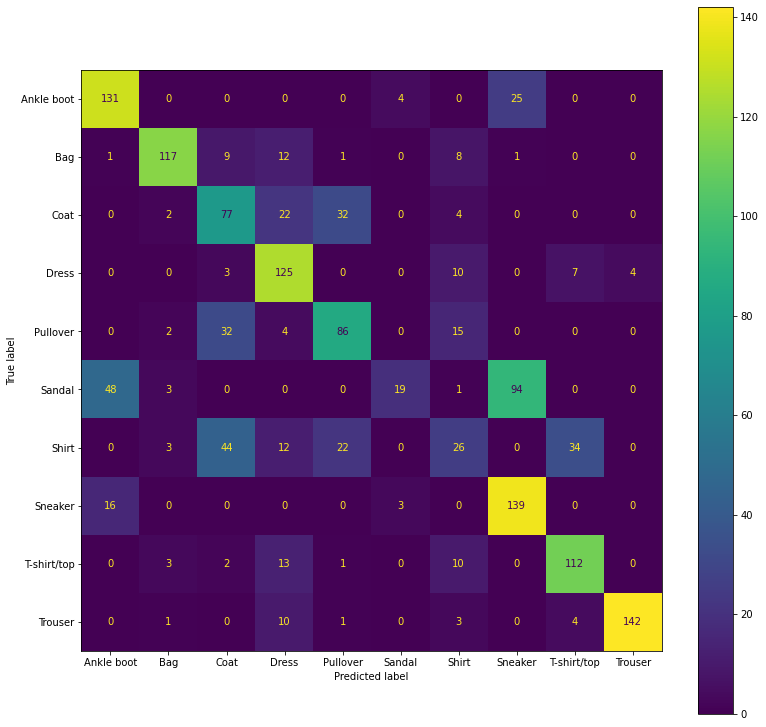

In [21]:
# MultinomialNB
MNB_model = MultinomialNB() # an empty MultinomialNB model

build_and_eval_model(MNB_model, X, y)

In [22]:
print( the worst.')

YOUR_ANSWER_HERE model did the best and YOUR_ANSWER_HERE model did the worst.
